In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cool_maps.plot as cplt
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import glob
import re

# from https://nedbatchelder.com/blog/200712/human_sorting.html
###############################################################################
def alphanum_key(s):
    """
    Turn a string into a list of string and number chunks.
    >>> alphanum_key("z23a")
    ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

# CSUM BUOY DATA
datlog_raw  = sorted(glob.glob('../python_code/data/B*.dat'),key=alphanum_key)
exo_raw     = sorted(glob.glob('../python_code/data/E*.dat'),key=alphanum_key)
ms3_raw     = sorted(glob.glob('../python_code/data/M*.dat'),key=alphanum_key)
ws_raw      = sorted(glob.glob('../python_code/data/W*.dat'),key=alphanum_key)
paraq1_raw  = sorted(glob.glob('../python_code/data/PAR_aqua1*.dat'),key=alphanum_key)
paraq2_raw  = sorted(glob.glob('../python_code/data/PAR_aqua2*.dat'),key=alphanum_key)
paratmo_raw = sorted(glob.glob('../python_code/data/PAR_atmo*.dat'),key=alphanum_key)

ImportError: DLL load failed while importing _imaging: The specified module could not be found.

NameError: name 'exo_hr' is not defined

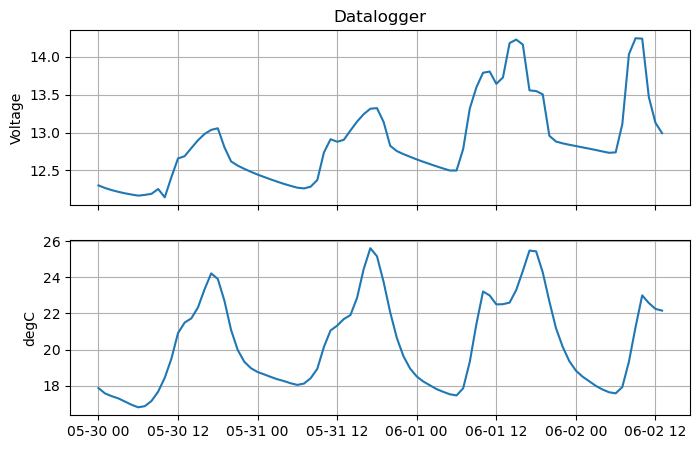

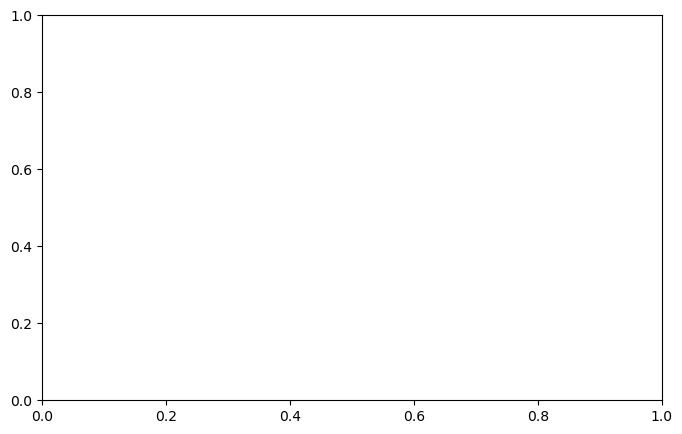

In [5]:
## DATALOGGER
datlog_list = [] # init empty dataframe 

for x in datlog_raw:
    loop = pd.read_csv(x,
                       sep=',',
                       names=['time','record','BattV','PTemp'],
                       header=3,
                       parse_dates=[0]) 
    datlog_list.append(loop)

dl = pd.concat(datlog_list,ignore_index=True)   # dl for datalogger sensor values 
dl = dl.set_index('time')                   # set the time column to be the index
dl = dl.loc['2023-05-30':'2023-06-03']      # slicing dates I want
dl_hr = dl.resample('1H').mean()

fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(8,5),sharex=True)
ax[0].set_title('Datalogger')

ax[0].plot(dl_hr.index,dl_hr.BattV)
ax[0].set_ylabel('Voltage')
ax[0].grid()

ax[1].plot(dl_hr.index,dl_hr.PTemp)
ax[1].set_ylabel('degC')
ax[1].grid();

#####################
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(exo_hr.index,exo_hr.CablePower,label='EXO Cable Power',color='black')
ax.plot(dl_hr.index,dl_hr.BattV,label='Datalogger')
ax.legend()
ax.set_ylabel('Volts')
ax.set_title('Voltages')


# fig,ax=plt.subplots(figsize=(8,5))
# ax.plot(dl.index,dl.BattV,label='Battery Voltage')
# ax.set_ylabel('Voltage')
# ax2=ax.twinx()
# ax2.plot(dl.index,dl.PTemp,label='Panel Temp',color='red')
# ax2.set_ylabel('degC')
# ax.legend()
# ax2.legend()

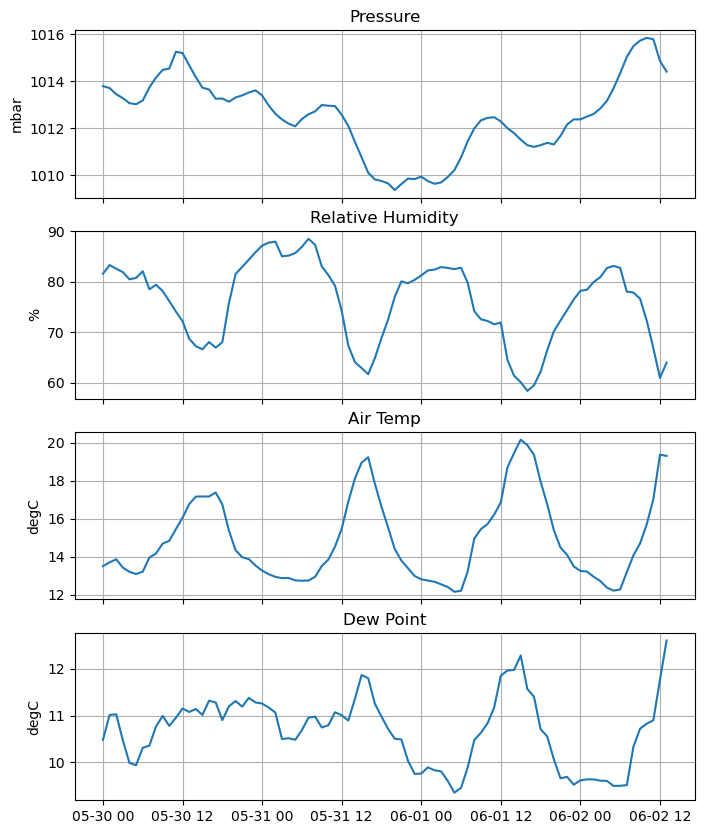

In [9]:
## MET STATION
met_list = [] # init empty dataframe 

for x in ms3_raw:
    loop = pd.read_csv(x,
                       sep=',',
                       names=["time","record","BP","RH","AirTemp","DP"],
                       header=3,
                       parse_dates=[0]) 
    met_list.append(loop)

met = pd.concat(met_list,ignore_index=True)   
met = met.set_index('time')                   # set the time column to be the index
met = met.loc['2023-05-30':'2023-06-03']      # slicing dates I want
met_hr = met.resample('1H').mean()

fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=ax)

ax[0].plot(met_hr.index,met_hr.BP)
ax[0].set_ylabel('mbar')
ax[0].set_title('Pressure')

ax[1].plot(met_hr.index,met_hr.RH)
ax[1].set_ylabel('%')
ax[1].set_title('Relative Humidity')

ax[2].plot(met_hr.index,met_hr.AirTemp)
ax[2].set_ylabel('degC')
ax[2].set_title('Air Temp')

ax[3].plot(met_hr.index,met_hr.DP)
ax[3].set_ylabel('degC')
ax[3].set_title('Dew Point')

ax[0].grid(),ax[1].grid(),ax[2].grid(),ax[3].grid();

# THIS IS JUST TO SEE THE DIFFERENCE BETWEEN THE HR BIN AVERAGES AND NOT 
# here to see the diff to show people

# fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=ax[0])

# ax[0].plot(dl.index,dl.BP)
# ax[0].set_ylabel('mbar')
# ax[0].set_title('Pressure')

# ax[1].plot(dl.index,dl.RH)
# ax[1].set_ylabel('%')
# ax[1].set_title('Relative Humidity')

# ax[2].plot(dl.index,dl.AirTemp)
# ax[2].set_ylabel('degC')
# ax[2].set_title('Air Temp')

# ax[3].plot(dl.index,dl.DP)
# ax[3].set_ylabel('degC')
# ax[3].set_title('Dew Point')

In [5]:
## WS
ws_list = [] # init empty dataframe 

for x in ws_raw:
    loop = pd.read_csv(x,sep=',',
                       names=["time","record","fWSV1","fWSV2","fWSV3","fWSC","iWSDiag","iWSValue"],
                       header=3,
                       parse_dates=[0]) 
    ws_list.append(loop)

ws = pd.concat(ws_list,ignore_index=True)   
ws
ws = ws.set_index('time')                   # set the time column to be the index
# ws = ws.loc['2023-05-28':'2023-06-03']      # slicing dates I want

# ws_hhr = ws.resample('30MIN').mean()
# ws_2hr = ws.resample('2H').mean()

# fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=ax)

# ax[0].plot(ws_hhr.index,ws_hhr.fWSV1)
# #ax[0].set_ylabel('Wind Speed') dunno
# ax[0].set_title('fWSV1')

# ax[1].plot(ws_hhr.index,ws_hhr.fWSV2)
# ax[1].set_title('fWSV2')

# ax[2].plot(ws_hhr.index,ws_hhr.fWSV3)
# ax[2].set_title('fWSV3')

# ax[3].plot(ws_2hr.index,ws_2hr.fWSC)
# ax[3].set_title('Direction')

# ax[0].grid(),ax[1].grid(),ax[2].grid(),ax[3].grid();

,time,record,fWSV1,fWSV2,fWSV3,fWSC,iWSDiag,iWSValue
0,2023-05-26 14:18:28.5,0,0.00,0.00,0.00,0.00,0,0
1,2023-05-26 14:18:28.55,1,0.00,0.00,0.00,0.00,0,0
2,2023-05-26 14:18:28.6,2,0.00,0.00,0.00,0.00,0,0
3,2023-05-26 14:18:28.65,3,0.00,0.00,0.00,0.00,0,0
4,2023-05-26 14:18:28.7,4,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
10464789,2023-06-02 12:59:59.8,10231801,0.59,0.54,-0.96,296.42,4,0
10464790,2023-06-02 12:59:59.85,10231802,0.79,0.80,-0.92,296.56,5,0
10464791,2023-06-02 12:59:59.9,10231803,1.14,0.89,-1.00,296.89,6,1
10464792,2023-06-02 12:59:59.95,10231804,1.02,0.71,-1.27,296.79,1,10


In [6]:
ws = ws.set_index('time')   


In [7]:
ws

,record,fWSV1,fWSV2,fWSV3,fWSC,iWSDiag,iWSValue
time,,,,,,,
2023-05-26 14:18:28.5,0,0.00,0.00,0.00,0.00,0,0
2023-05-26 14:18:28.55,1,0.00,0.00,0.00,0.00,0,0
2023-05-26 14:18:28.6,2,0.00,0.00,0.00,0.00,0,0
2023-05-26 14:18:28.65,3,0.00,0.00,0.00,0.00,0,0
2023-05-26 14:18:28.7,4,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...
2023-06-02 12:59:59.8,10231801,0.59,0.54,-0.96,296.42,4,0
2023-06-02 12:59:59.85,10231802,0.79,0.80,-0.92,296.56,5,0
2023-06-02 12:59:59.9,10231803,1.14,0.89,-1.00,296.89,6,1


In [ ]:
## EXO
exo_list = [] # init empty dataframe 

for x in exo_raw:
    loop = pd.read_csv(x,
                       sep=',',
                       names=["time","record","Chloro","nLFCond","Pressure",
                       "Turbidity","Temp","Cond","D_OX","Sal","TSS","VerticalPosition",
                       "Depth","D_OX2","SpCond","WiperPosition","BPower","fDOM","D_OX3",
                       "Phycoerythrin","pH","CablePower","fDOM2","ORP","TDS","pH2"],
                       header=2,
                       na_values='NaN',
                       parse_dates=[0]) 
    exo_list.append(loop)

exo    = pd.concat(exo_list,ignore_index=True)   
exo    = exo.set_index('time')                          # set the time column to be the index
exo    = exo.loc['2023-05-30':'2023-06-03']             # slicing dates I want
exo_hr = exo.astype('float').resample('1H').mean()      # but what is the astype doing really

for key in exo_hr:
    print(key, exo_hr[key].shape)

# fig,ax = plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=True)

# ax[0].plot(dlexo_hr.index,dlexo_hr.Chloro)
# ax[0].set_ylabel('RFU')
# ax[0].set_title('Chlorophyll')

# ax[1].plot(dlexo_hr.index,dlexo_hr.nLFCond)
# ax[1].set_ylabel('microSimens/cm')
# ax[1].set_title('nLFCond')

# ax[2].plot(dlexo_hr.index,dlexo_hr.Pressure)
# ax[2].set_ylabel('psia')
# ax[2].set_title('Pressure')

# ax[3].plot(dlexo_hr.index,dlexo_hr.Turbidity)
# ax[3].set_ylabel('FNU')
# ax[3].set_title('Turbidity')

# ax[0].grid(),ax[1].grid(),ax[2].grid(),ax[3].grid();


record (86,)
Chloro (86,)
nLFCond (86,)
Pressure (86,)
Turbidity (86,)
Temp (86,)
Cond (86,)
D_OX (86,)
Sal (86,)
TSS (86,)
VerticalPosition (86,)
Depth (86,)
D_OX2 (86,)
SpCond (86,)
WiperPosition (86,)
BPower (86,)
fDOM (86,)
D_OX3 (86,)
Phycoerythrin (86,)
pH (86,)
CablePower (86,)
fDOM2 (86,)
ORP (86,)
TDS (86,)
pH2 (86,)


In [ ]:
## PAR
## The atmo and paraq1 sensors were swapped in the wiring during the test

# init PAR top
dfaq1_list = [] # init empty dataframe 
for x in paratmo: # UNSWAPING PAR1 AND ATMO, real paraq1 data is in atmo from datalogger
    loop = pd.read_csv(x,sep=',',names=["time","record","PAR_aqua1_Den","PAR_aqua1_Tot"],
                       header=3,
                       parse_dates=[0],
                       encoding = "utf-8") 
    dfaq1_list.append(loop)

dl1 = pd.concat(dfaq1_list,ignore_index=True)       
dl1 = dl1.set_index('time')                         # set the time column to be the index
dl1 = dl1.loc['2023-05-30':'2023-06-01']            # slicing dates I want
dl1_hr = dl1.astype('int64').resample('1H').mean()  # but what is the astype doing really

# init PAR bottom
dfaq2_list = [] # init empty dataframe 
for y in paraq2:
    loop = pd.read_csv(y,
                       sep=',',
                       names=["time","record","PAR_aqua2_Den","PAR_aqua2_Tot"],
                       header=3,
                       parse_dates=[0],
                       encoding = "utf-8") 
    dfaq2_list.append(loop)

dl2 = pd.concat(dfaq2_list,ignore_index=True)         
dl2 = dl2.set_index('time')                           # set the time column to be the index
dl2 = dl2.loc['2023-05-30':'2023-06-01']              # slicing dates I want
dl2_hr = dl2.astype('int64').resample('1H').mean()    # but what is the astype doing really

# init PAR atmo
dfatmo_list = [] # init empty dataframe 
for y in paraq1: # UNSWAPPING PAR1 AND ATMO, real atmo data is in paraq1 from datalogger
    loop = pd.read_csv(y,
                       sep=',',
                       names=["time","record","PAR_atmo_Den","PAR_atmo_Tot"],
                       header=3,
                       parse_dates=[0],
                       encoding = "utf-8") 
    dfatmo_list.append(loop)

dl3 = pd.concat(dfatmo_list,ignore_index=True)        
dl3 = dl3.set_index('time')                           # set the time column to be the index
dl3 = dl3.loc['2023-05-30':'2023-06-01']              # slicing dates I want
dl3_hr = dl3.astype('int64').resample('1H').mean()    # but what is the astype doing really

# fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(8,5))
# ax[0].plot(dl_hr.index,dl_hr.PAR_aqua1_Tot)
# ax[0].set_ylabel('aqua1')
# ax[1].plot(dl2_hr.index,dl2_hr.PAR_aqua2_Tot)
# ax[1].set_ylabel('aqua2')

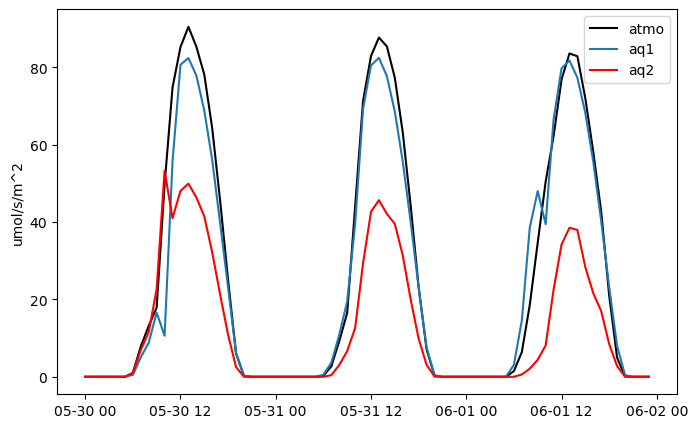

In [ ]:
# plot three PAR sensors on same plot
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(dl3_hr.index,dl3_hr.PAR_atmo_Tot,label='atmo',color='black')
ax.plot(dl1_hr.index,dl1_hr.PAR_aqua1_Tot,label='aq1')
ax.plot(dl2_hr.index,dl2_hr.PAR_aqua2_Tot,label='aq2',color='red')
ax.set_ylabel('umol/s/m^2')
ax.legend();

<Axes: xlabel='time'>

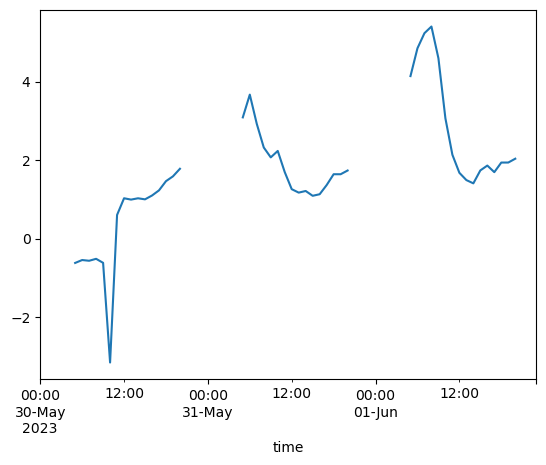

In [ ]:
# this is not right
Lz = dl2_hr.PAR_aqua2_Den # deeper one 
Lo = dl1_hr.PAR_aqua1_Den # upper one 
Z = 0.5

atten = -(np.log(Lz/Lo))/Z
atten.plot()

In [ ]:
# The Closest National Date Buoy Center station is DPXC1
# https://www.ndbc.noaa.gov/station_history.php?station=dpxc1
# 38.056 N
# 122.264 W

# May
urlmay        = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=dpxc152023.txt.gz&dir=data/stdmet/May/'
davismay      = pd.read_csv(urlmay,                      # read in raw csv data
                           header=[0],                  # want line 0 for head info
                           na_values=('999.0','99.0'),  # clean data
                           skiprows=[1],                # skip row with units
                           sep='\s+')                   # seperator is a space
time          = davismay.iloc[:,0:5]                     # locate just the time columns on the left
time.columns  = ['year','month','day','hour','minute']   # rename the columns for next step
mayindex      = pd.to_datetime(time,format='stdmet')     # convert to datetime and make index
davismay      = davismay.set_index(mayindex)             # set index for May's data
davismay      = davismay.loc['2023-05-30':'2023-06-03']  # slicing dates I want
davismay.PRES = davismay.PRES[davismay.PRES < 1500]     # prior na_values didn't catch this
davismay_hhr  = davismay.resample('30MIN').mean()        # 30 min averages to make plots cleaner 

# June // same as above
urljune      = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=dpxc162023.txt.gz&dir=data/stdmet/Jun/'
davisjune    = pd.read_csv(urljune,
                           header=[0],
                           na_values=('999.0','99.0'),
                           skiprows=[1],
                           sep='\s+')  
time          = davisjune.iloc[:,0:5]
time.columns  = ['year','month','day','hour','minute']
juneindex     = pd.to_datetime(time,format='stdmet') 
davisjune     = davisjune.set_index(juneindex)
davisjune     = davisjune.loc['2023-05-30':'2023-06-03']      
davisjune.PRES = davisjune.PRES[davisjune.PRES < 1500]
davisjune_hhr = davisjune.resample('30MIN').mean()
davisjune.head(1)

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
2023-06-01,2023,6,1,0,0,213.0,8.5,9.8,NaN,NaN,NaN,NaN,1009.7,16.1,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Comparison:\nCSUM Buoy and DPXC1 (Davis Point)')

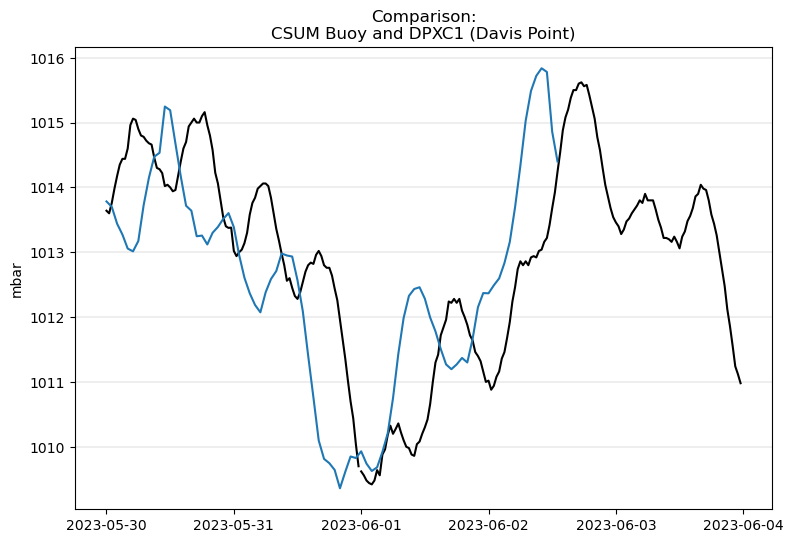

In [10]:
fig = plt.figure(figsize=(9,6))

plt.plot(davisjune_hhr.index,davisjune_hhr.PRES,color='k')
plt.plot(davismay_hhr.index,davismay_hhr.PRES,color='k')
plt.plot(met_hr.index,met_hr.BP)
plt.ylabel('mbar')
plt.grid(lw=0.3,axis='y')
plt.title('Comparison:\nCSUM Buoy and DPXC1 (Davis Point)')

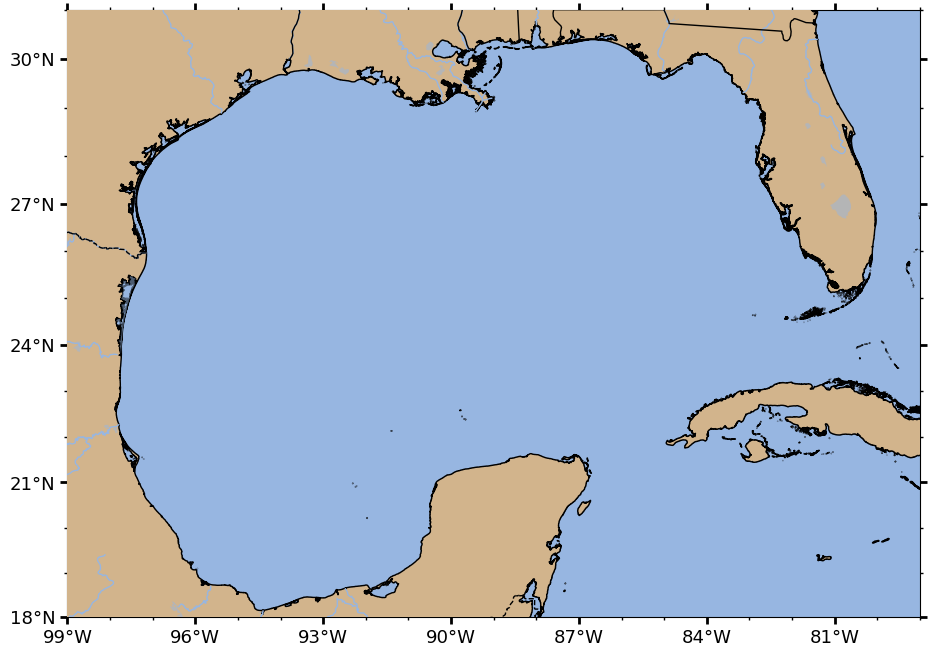

In [2]:

# import os

extent = [-99, -79, 18, 31]
# cplt.create(extent, proj=ccrs.Mercator(), bathymetry=True, isobaths=(-1000, -500, -10))


fig, ax = cplt.create(extent)


# save_path = os.getcwd()
# print(save_path)

# fig, ax= cplt.create(extent, proj=ccrs.Mercator(),figsize=(16,9)) #, bathymetry=True, isobaths=(-1000, -500, -10), 
# cplt.export_fig(save_path, "test.png")
# plt.close()

# load it 

# fig, ax = cplt.load_fig(os.path.join(save_path, "test.pkl"))
# plt.plot(-87, 26, 'ro', markersize=12, transform=ccrs.PlateCarree())
